# Aspect-Sentiment EDA (review_aspect_extractions)

This notebook explores aspect-level sentiment extracted from reviews, focusing on trends by offerings, destinations, and overall customer sentiment and aspects.

In [19]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 120)

print('✓ Libraries ready')

✓ Libraries ready


In [20]:
aspect_df = pd.read_csv("../data/prepared_dataset.csv")

In [21]:
aspect_df.head()

,id,content,date,language,tags,title,ratings,normalized_ratings,raw_ratings,offer,destination,offer_2,destination_2,offer_3,destination_3,offer_4,destination_4,offer_5,destination_5,text_for_analysis,title_for_analysis,content_length,word_count,char_count,title_word_count,title_char_count,cleaned_text,tokens,token_count,year_month,id_numeric,text_id,aspect,evidence_span,polarity,confidence,model,latency_ms,aspect_normalized,evidence_len,month
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,الاماكن,الاماكن,positive,0.9982,pyabsa-multilingual,49136.0,الاماكن,7.0,2021-04-01
1,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,التسوق,التسوق,positive,0.9976,pyabsa-multilingual,49136.0,التسوق,6.0,2021-04-01
2,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,للسباحه,للسباحه,positive,0.9987,pyabsa-multilingual,43433.0,للسباحه,7.0,2021-04-01
3,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,سعره,سعره,neutral,0.7243,pyabsa-multilingual,43845.0,سعره,4.0,2021-04-01
4,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,seafront,seafront,p

## Aspect normalization
Consolidate similar aspects (plural/singular, case variations, etc.) to reduce duplication and improve analysis clarity.

In [22]:
import re

def normalize_aspect(aspect):
    """
    Normalize aspect text to consolidate duplicates:
    - Lowercase
    - Remove extra whitespace
    - Remove leading/trailing punctuation
    - Plurals to singular (simple -s/-es rules)
    """
    if not aspect or not isinstance(aspect, str):
        return ""
    
    # Remove leading quotes/apostrophes
    aspect = aspect.strip().lstrip("'\"")
    
    # Lowercase
    aspect = aspect.lower()
    
    # Normalize whitespace
    aspect = re.sub(r'\s+', ' ', aspect).strip()
    
    # Simple plural to singular conversion
    if len(aspect) > 4:
        if aspect.endswith('ies') and not aspect.endswith('series'):
            aspect = aspect[:-3] + 'y'
        elif aspect.endswith('sses') or aspect.endswith('xes') or aspect.endswith('shes') or aspect.endswith('ches'):
            aspect = aspect[:-2]
        elif aspect.endswith('s') and not aspect.endswith('ss') and not aspect.endswith('us'):
            if len(aspect) > 3:
                aspect = aspect[:-1]
    
    return aspect

import pandas as pd

print("\n📊 Example consolidations (top 20 normalized aspects):")

# Build a clean table for grouping (no NaNs, all strings)
tmp = aspect_df[['aspect_normalized', 'aspect']].copy()
tmp = tmp.dropna(subset=['aspect_normalized'])                     # drop rows with NaN normalized key
tmp['aspect_normalized'] = tmp['aspect_normalized'].astype(str).str.strip()
tmp = tmp[tmp['aspect_normalized'] != '']                          # drop empty normalized keys
tmp['aspect'] = tmp['aspect'].apply(lambda v: str(v).strip() if pd.notna(v) else None)
tmp = tmp.dropna(subset=['aspect'])                                # drop NaN originals after cast

# Group: collect unique, sorted variants and counts
consolidation_examples = (
    tmp.groupby('aspect_normalized')['aspect']
       .apply(lambda x: sorted(set(x)))
       .to_frame('original_variants')
)
consolidation_examples['count'] = tmp.groupby('aspect_normalized').size()
consolidation_examples = consolidation_examples.sort_values('count', ascending=False)

# Print top 20
for idx, row in consolidation_examples.head(20).iterrows():
    variants = row['original_variants']
    # defensively ensure all strings (in case anything sneaks in)
    variants = [str(v) for v in variants if pd.notna(v)]
    preview = ', '.join(variants[:5]) if variants else '(no examples)'
    if len(variants) > 1:
        print(f"\n'{idx}' (n={row['count']}): {preview}")
    else:
        print(f"'{idx}' (n={row['count']}): {preview}")



📊 Example consolidations (top 20 normalized aspects):
'مكان' (n=690): مكان

'place' (n=546): PLACE, Place, place, places
'فندق' (n=315): فندق
'المكان' (n=312): المكان
'الفندق' (n=140): الفندق

'food' (n=123): Food, food, foods
'منتزه' (n=114): منتزه

'service' (n=110): Service, Services, service, services

'staff' (n=108): Staff, Staffs, staff, staffs
'موقع' (n=92): موقع
'حديقة' (n=90): حديقة
'الاستقبال' (n=90): الاستقبال

'price' (n=87): Price, Prices, price, prices
'الخدمات' (n=84): الخدمات

'park' (n=83): Park, Parks, park
'مطعم' (n=81): مطعم
'الحرم' (n=74): الحرم
'خدمات' (n=71): خدمات
'السعر' (n=68): السعر
'الموقع' (n=67): الموقع


In [23]:
aspect_df.info()

missing = aspect_df.isna().mean().sort_values(ascending=False)
print("\nMissingness (top 10):\n", missing.head(10))

print("\nDistinct counts:")
for col in ["review_id", "aspect", "destination", "offer", "polarity",  "model"]:
    if col in aspect_df.columns:
        print(f"- {col}: {aspect_df[col].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21689 entries, 0 to 21688
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21689 non-null  object 
 1   content             21689 non-null  object 
 2   date                21689 non-null  object 
 3   language            21689 non-null  object 
 4   tags                21689 non-null  object 
 5   title               21689 non-null  object 
 6   ratings             21679 non-null  object 
 7   normalized_ratings  21679 non-null  float64
 8   raw_ratings         21679 non-null  float64
 9   offer               21689 non-null  object 
 10  destination         21689 non-null  object 
 11  offer_2             5192 non-null   object 
 12  destination_2       5192 non-null   object 
 13  offer_3             931 non-null    object 
 14  destination_3       931 non-null    object 
 15  offer_4             336 non-null    object 
 16  dest

## Polarity distribution and top aspects

In [24]:
import arabic_reshaper
from bidi.algorithm import get_display

def display_arabic(text):
    """Reshapes Arabic text so it renders correctly in Matplotlib."""
    if not isinstance(text, str):
        return text
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)


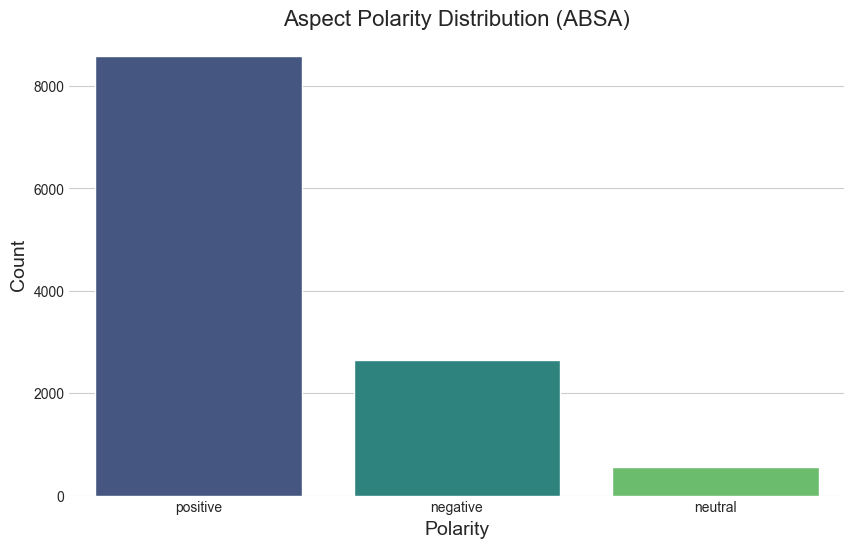

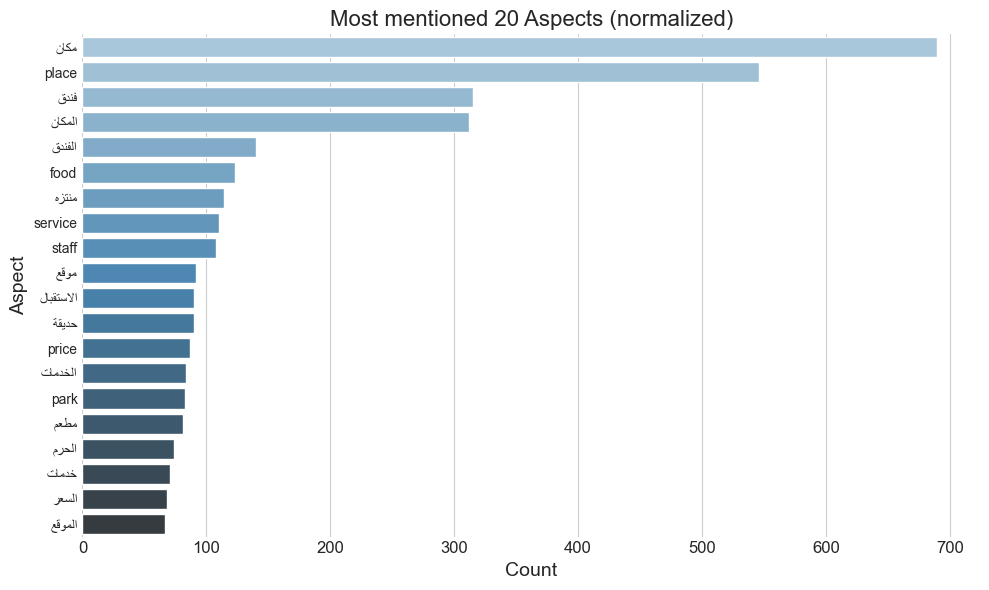

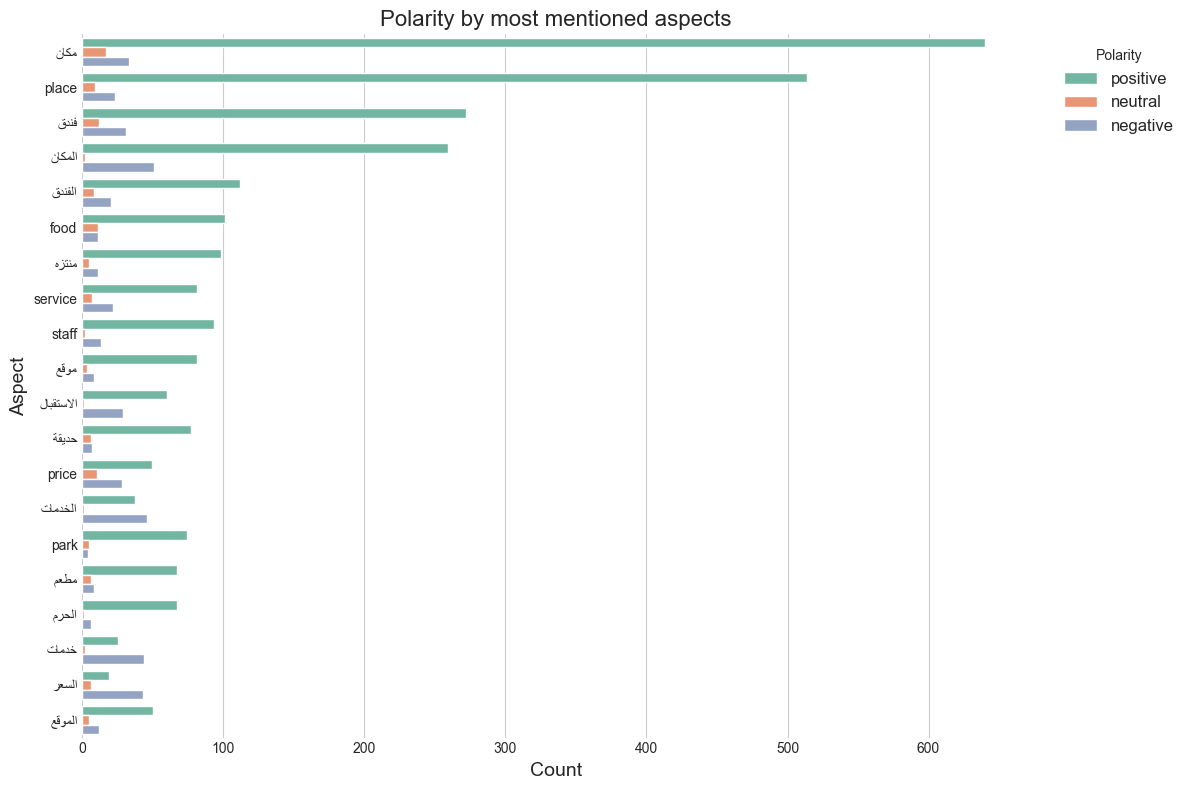

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import rcParams

# Set the font that supports Arabic characters
matplotlib.rcParams['font.family'] = 'Arial'  # Arial or Tahoma support Arabic well

# Ensure proper right-to-left rendering (important for Arabic text)
matplotlib.rcParams['axes.unicode_minus'] = False  # Handle minus sign correctly

# Set Seaborn Style for better aesthetics
sns.set_style('whitegrid')  # A clean background style with gridlines

# Create your plots after setting the correct fonts
absa_df = aspect_df.loc[aspect_df.model == "pyabsa-multilingual"]

# Top aspects overall (using normalized)
top_aspects = aspect_df['aspect_normalized'].value_counts().head(20)

# Polarity distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=absa_df, x='polarity', order=absa_df['polarity'].value_counts().index, palette='viridis')
plt.title('Aspect Polarity Distribution (ABSA)', fontsize=16)
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Top aspects overall (using normalized)

# Apply Arabic fix only to aspect labels (index)
top_aspects_ar = top_aspects.copy()
top_aspects_ar.index = [display_arabic(x) for x in top_aspects.index]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_aspects_ar.values, y=top_aspects_ar.index, palette='Blues_d')
plt.title('Most mentioned 20 Aspects (normalized)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Aspect', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


# Polarity by top aspects
top_list = set(top_aspects.index)
sub = aspect_df[aspect_df['aspect_normalized'].isin(top_list)].copy()

# Add a reshaped version just for display
sub['aspect_ar'] = sub['aspect_normalized'].apply(display_arabic)

plt.figure(figsize=(12, 8))
sns.countplot(
    data=sub,
    y='aspect_ar',
    hue='polarity',
    order=[display_arabic(x) for x in top_aspects.index],
    palette='Set2'
)
plt.title('Polarity by most mentioned aspects', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Aspect', fontsize=14)
plt.legend(title='Polarity', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


## Offering and destination breakdowns

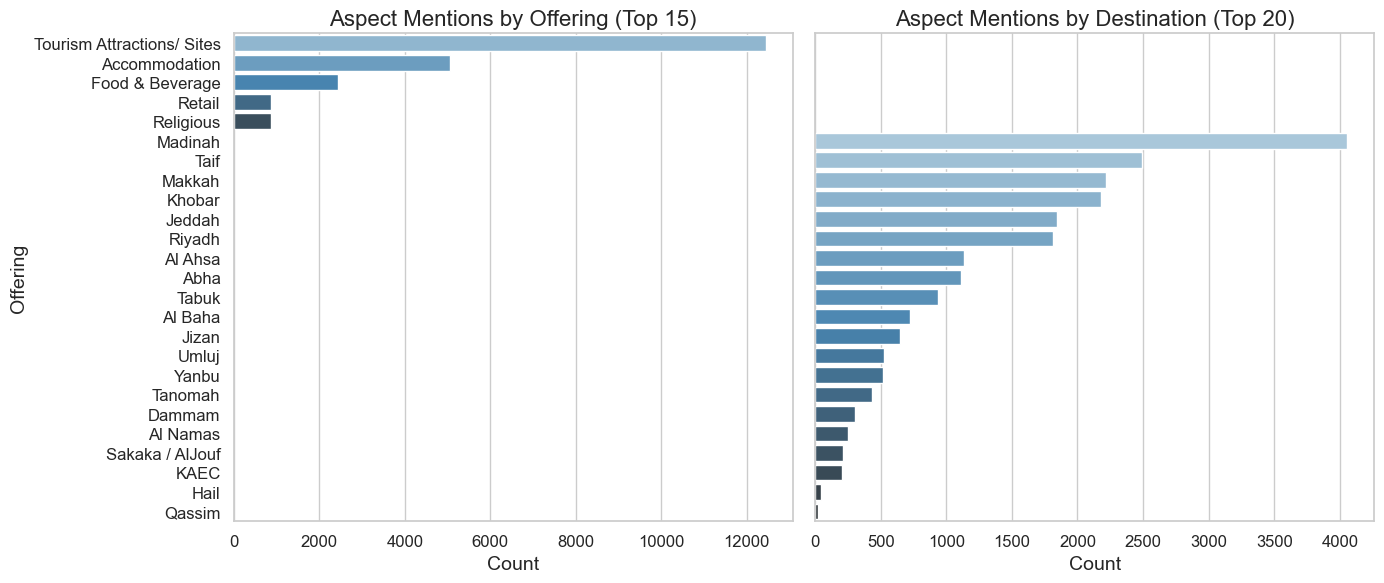

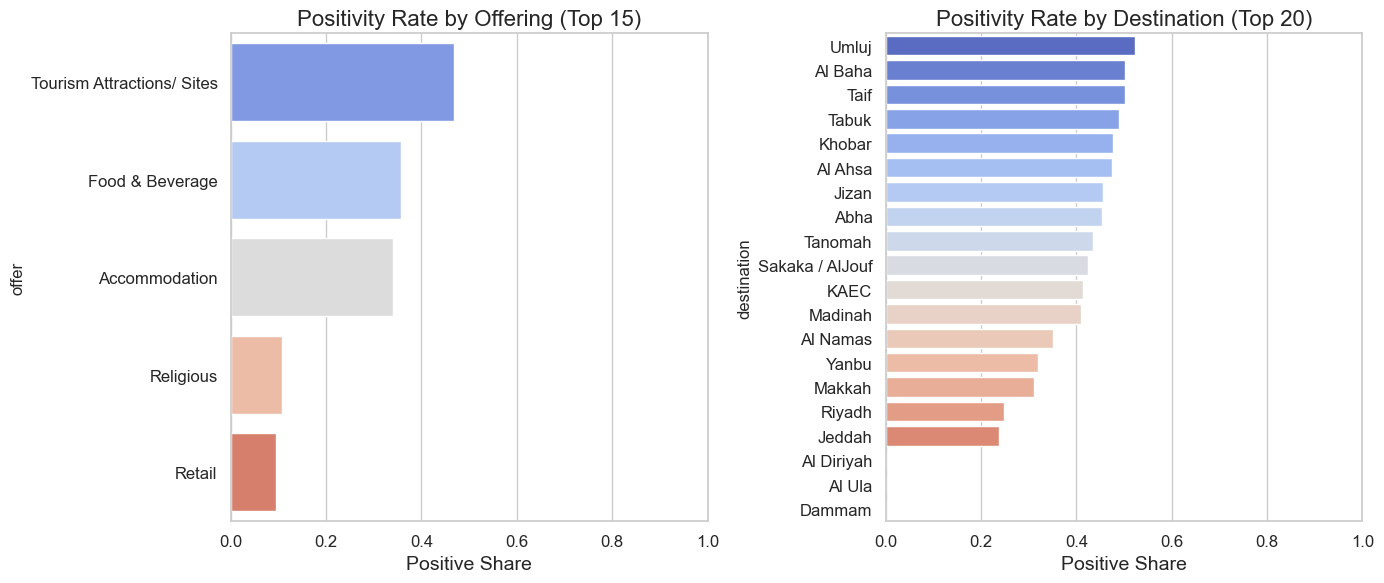

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for all plots
sns.set(style='whitegrid', palette='muted')

# Aspect counts by offering and destination
by_offering = aspect_df.groupby('offer').size().sort_values(ascending=False).head(15)
by_destination = aspect_df.groupby('destination').size().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Aspect Mentions by Offering (Top 15)
sns.barplot(x=by_offering.values, y=by_offering.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Aspect Mentions by Offering (Top 15)', fontsize=16)
axes[0].set_xlabel('Count', fontsize=14)
axes[0].set_ylabel('Offering', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)

# Aspect Mentions by Destination (Top 20)
sns.barplot(x=by_destination.values, y=by_destination.index, ax=axes[1], palette='Blues_d')
axes[1].set_title('Aspect Mentions by Destination (Top 20)', fontsize=16)
axes[1].set_xlabel('Count', fontsize=14)
axes[1].set_ylabel('Destination', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

# Positivity rate by offering and destination
def positivity_rate(g):
    return (g['polarity'].astype(str).str.lower().eq('positive').mean())

pos_by_off = aspect_df.groupby('offer').apply(positivity_rate).sort_values(ascending=False)
pos_by_dest = aspect_df.groupby('destination').apply(positivity_rate).sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Positivity Rate by Offering (Top 15)
sns.barplot(x=pos_by_off.head(15).values, y=pos_by_off.head(15).index, ax=axes[0], palette='coolwarm')
axes[0].set_title('Positivity Rate by Offering (Top 15)', fontsize=16)
axes[0].set_xlabel('Positive Share', fontsize=14)
axes[0].set_xlim(0, 1)
axes[0].tick_params(axis='both', labelsize=12)

# Positivity Rate by Destination (Top 20)
sns.barplot(x=pos_by_dest.head(20).values, y=pos_by_dest.head(20).index, ax=axes[1], palette='coolwarm')
axes[1].set_title('Positivity Rate by Destination (Top 20)', fontsize=16)
axes[1].set_xlabel('Positive Share', fontsize=14)
axes[1].set_xlim(0, 1)
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


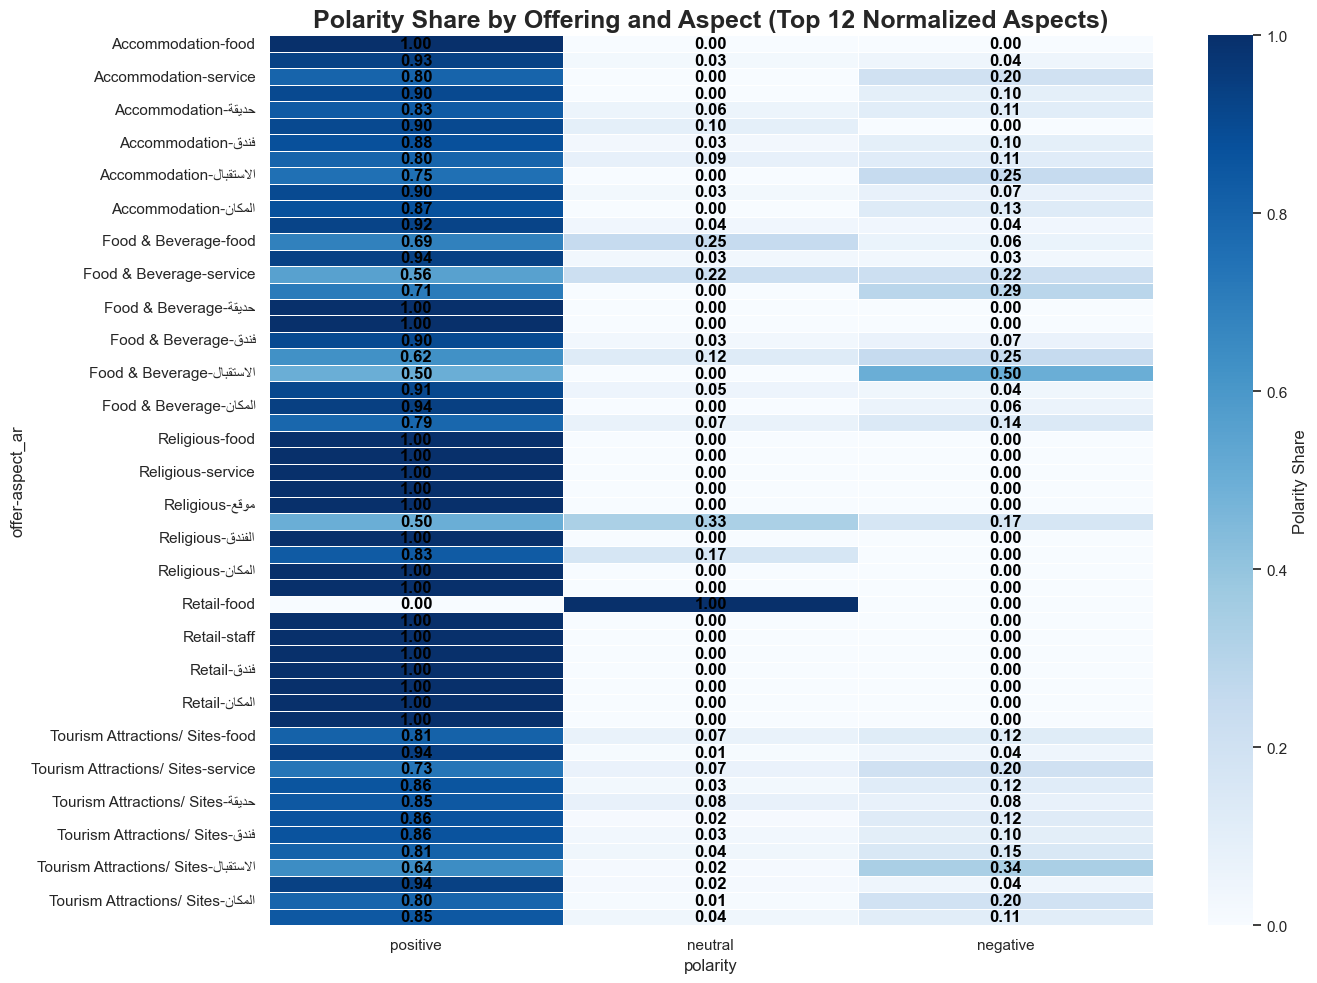

In [28]:
# Heatmap: polarity share by offering (top normalized aspects)
focus_aspects = aspect_df['aspect_normalized'].value_counts().head(12).index.tolist()
sub = aspect_df[aspect_df['aspect_normalized'].isin(focus_aspects)].copy()
sub = sub.dropna(subset=['offer', 'aspect_normalized', 'polarity'])
sub['polarity'] = sub['polarity'].astype(str).str.lower()

# 👉 Shape Arabic ONLY for aspect labels (keep everything else as-is)
sub['aspect_ar'] = sub['aspect_normalized'].apply(display_arabic)

hm_counts = (
    sub.groupby(['offer', 'aspect_ar', 'polarity'])
       .size()
       .reset_index(name='n')
)
hm_counts['share'] = hm_counts['n'] / hm_counts.groupby(['offer', 'aspect_ar'])['n'].transform('sum')

pivot = hm_counts.pivot_table(
    index=['offer', 'aspect_ar'],   # <- use the Arabic-shaped aspects here
    columns='polarity',
    values='share',
    fill_value=0
)

# Keep polarity column order if present
pol_order = ['positive', 'neutral', 'negative']
existing = [c for c in pol_order if c in pivot.columns]
pivot = pivot.reindex(columns=existing + [c for c in pivot.columns if c not in existing])

# Plot
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    pivot, cmap='Blues', annot=True, fmt=".2f",
    linewidths=0.7, linecolor='white',
    cbar_kws={'label': 'Polarity Share'},
    annot_kws={"size": 12, "weight": "bold", "color": "black"}
)
plt.title('Polarity Share by Offering and Aspect (Top 12 Normalized Aspects)', fontsize=18, weight='bold')
plt.tight_layout()

# Make Arabic y-tick labels nicer (no rotation, right-aligned)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
for t in ax.get_yticklabels():
    t.set_horizontalalignment('right')

plt.show()


## Temporal trends

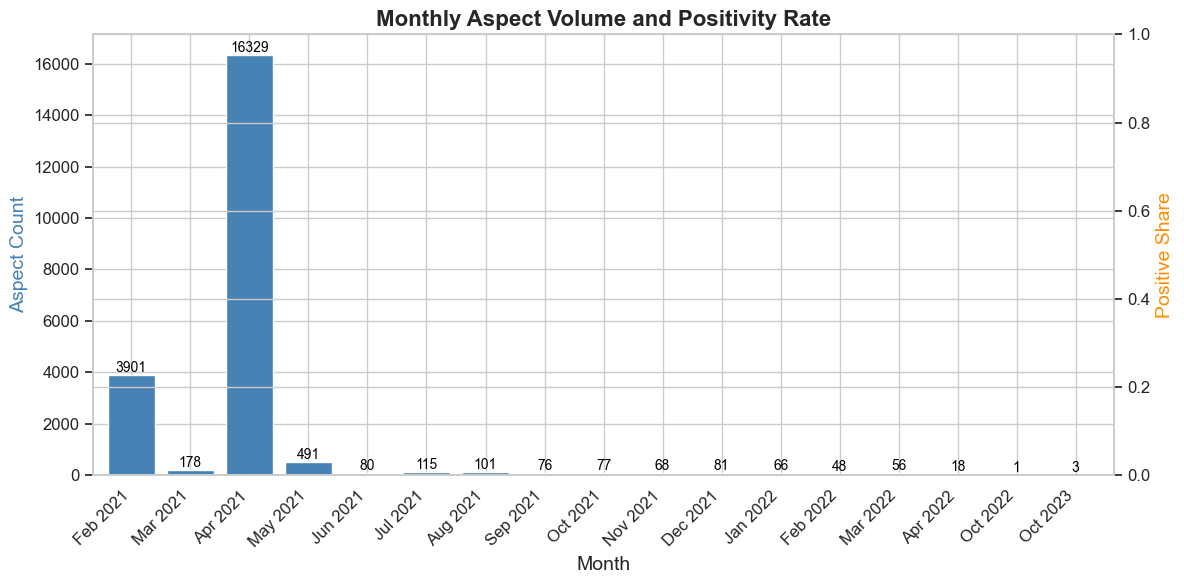

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming aspect_df and its columns ('date', 'polarity') are already available

# Normalize the 'date' to month-period
aspect_df['month'] = pd.to_datetime(aspect_df['date']).dt.to_period('M').dt.to_timestamp()

# =========================
# 1) Positivity Share Plot
# =========================

# Group by month and calculate the counts and positive share
by_month = aspect_df.groupby('month').size().rename('count').to_frame()

# Calculate the share of 'positive' aspects for each month
by_month['positive_share'] = aspect_df.groupby('month')['polarity'].apply(
    lambda s: s.str.lower().eq('positive').mean()  # Calculate positivity share
)

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for count of aspects per month (count of all aspects)
by_month['count'].plot(kind='bar', ax=ax1, color='steelblue', width=0.8)
ax1.set_ylabel('Aspect Count', color='steelblue', fontsize=14)
ax1.set_xlabel('Month', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

# Annotations for bars: adding the count on top of each bar
for x, v in enumerate(by_month['count'].values):
    ax1.text(x, v + 2, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Create the second y-axis for positive share
ax2 = ax1.twinx()
ax2.plot(by_month.index, by_month['positive_share'], color='darkorange', marker='o', markersize=6, linewidth=2)
ax2.set_ylabel('Positive Share', color='darkorange', fontsize=14)
ax2.set_ylim(0, 1)  # Ensure the y-axis for positivity share goes from 0 to 1
ax2.tick_params(axis='both', labelsize=12)

# Format x-axis labels to show months properly
ax1.set_xticks(range(len(by_month)))  # Ensure months are evenly spaced
ax1.set_xticklabels(by_month.index.strftime('%b %Y'), rotation=45, ha='right', fontsize=12)

# Title of the plot
plt.title('Monthly Aspect Volume and Positivity Rate', fontsize=16, weight='bold')

# Adjust layout for better fitting
plt.tight_layout()

# Show the plot
plt.show()


## Approach, model, and confidence

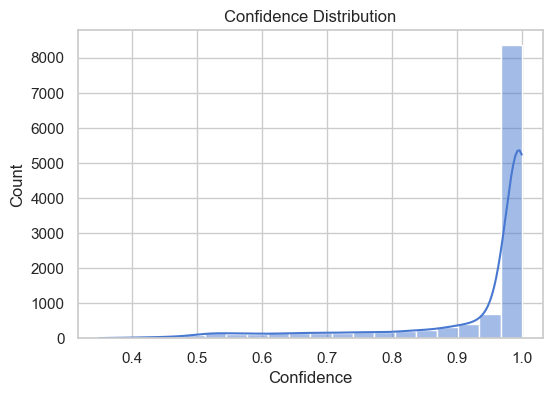

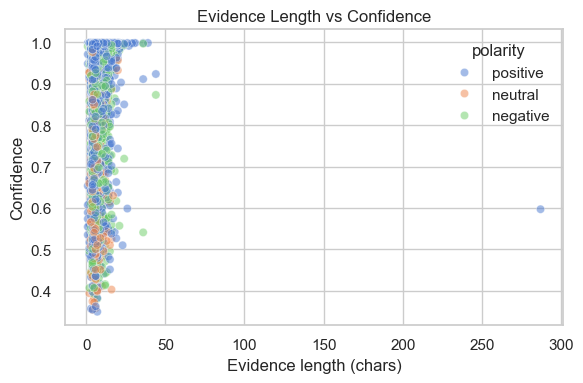

In [ ]:
# Confidence distribution
plt.figure(figsize=(6,4))
sns.histplot(aspect_df['confidence'].dropna(), bins=20, kde=True)
plt.title('Confidence Distribution')
plt.xlabel('Confidence')
plt.show()

# Evidence length vs confidence
aspect_df['evidence_len'] = aspect_df['evidence_span'].fillna('').str.len()
plt.figure(figsize=(6,4))
sns.scatterplot(data=aspect_df, x='evidence_len', y='confidence', hue='polarity', alpha=0.5)
plt.title('Evidence Length vs Confidence')
plt.xlabel('Evidence length (chars)')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

## Negative-focused analysis
We’ll dig into negative polarity to surface actionable areas: most complained-about aspects, offerings/destinations with higher negative share, trends over time, and example evidence.

In [32]:
# Helper: normalized polarity
pol = aspect_df['polarity'].astype(str).str.lower().fillna('')
neg_mask = pol.eq('negative')


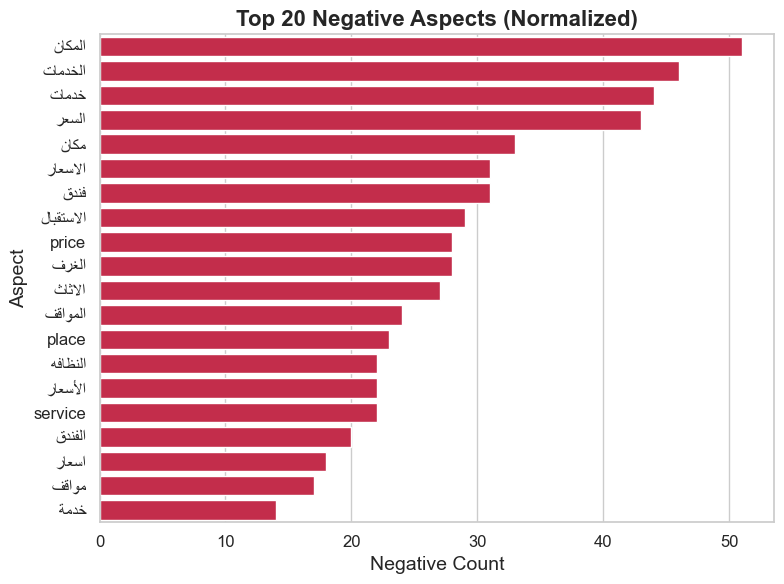

In [33]:

# --- 1) Top negative aspects (using normalized) ---
neg_aspects = aspect_df[neg_mask]['aspect_normalized'].value_counts().head(20)

# Apply Arabic fix only to the aspect labels
neg_aspects_ar = neg_aspects.copy()
neg_aspects_ar.index = [display_arabic(x) for x in neg_aspects.index]

plt.figure(figsize=(8, 6))
sns.barplot(x=neg_aspects_ar.values, y=neg_aspects_ar.index, color='crimson')
plt.title('Top 20 Negative Aspects (Normalized)', fontsize=16, weight='bold')
plt.xlabel('Negative Count', fontsize=14)
plt.ylabel('Aspect', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

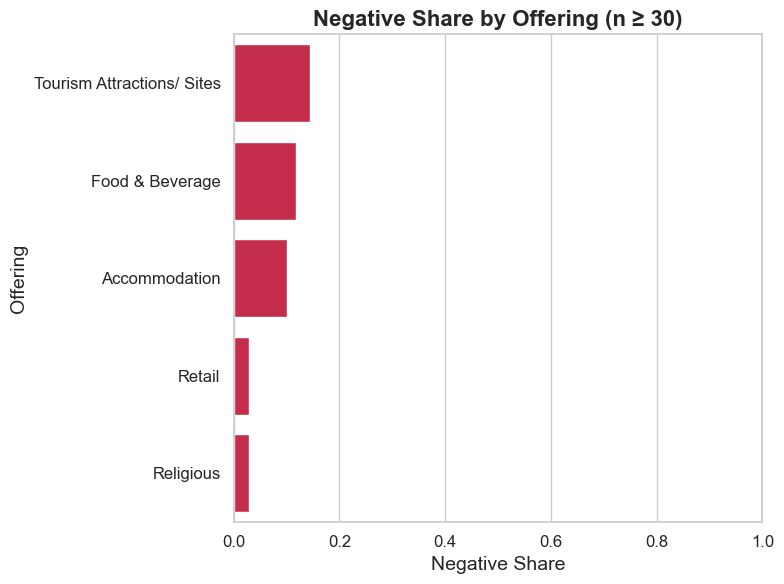

In [34]:
# 2) Highest negative share by offering/destination (min volume filter)
MIN_ROWS = 30
agg = (aspect_df
       .assign(is_neg=pol.eq('negative'))
       .groupby('offer')
       .agg(n=('is_neg', 'size'), neg_share=('is_neg', 'mean'))
       .query('n >= @MIN_ROWS')
       .sort_values('neg_share', ascending=False))

plt.figure(figsize=(8, 6))
sns.barplot(data=agg.head(15), x='neg_share', y=agg.head(15).index, color='crimson')
plt.title('Negative Share by Offering (n ≥ 30)', fontsize=16, weight='bold')
plt.xlabel('Negative Share', fontsize=14)
plt.ylabel('Offering', fontsize=14)
plt.xlim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


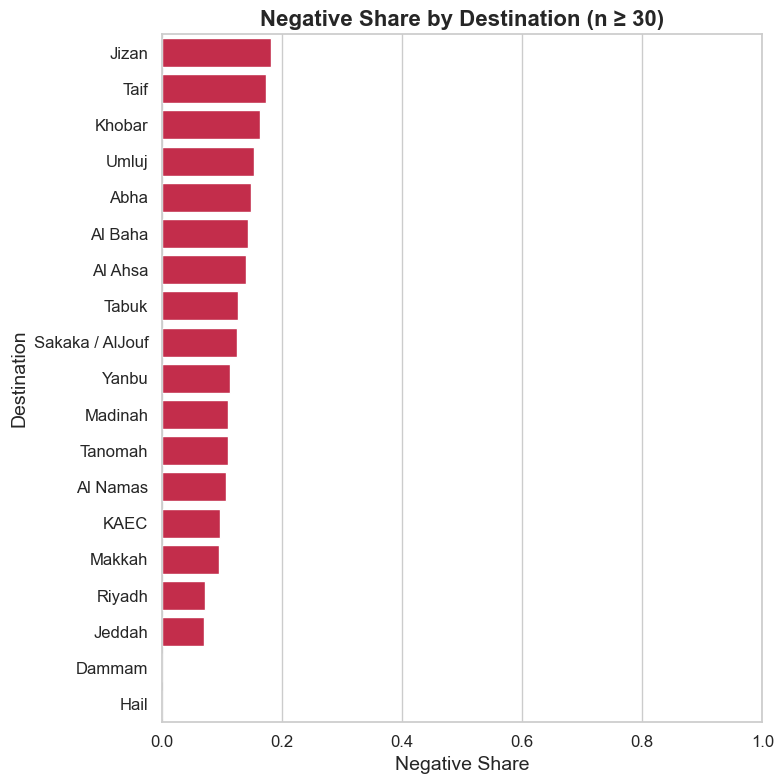

In [35]:
agg_d = (aspect_df
         .assign(is_neg=pol.eq('negative'))
         .groupby('destination')
         .agg(n=('is_neg', 'size'), neg_share=('is_neg', 'mean'))
         .query('n >= @MIN_ROWS')
         .sort_values('neg_share', ascending=False))

plt.figure(figsize=(8, 8))
sns.barplot(data=agg_d.head(20), x='neg_share', y=agg_d.head(20).index, color='crimson')
plt.title('Negative Share by Destination (n ≥ 30)', fontsize=16, weight='bold')
plt.xlabel('Negative Share', fontsize=14)
plt.ylabel('Destination', fontsize=14)
plt.xlim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


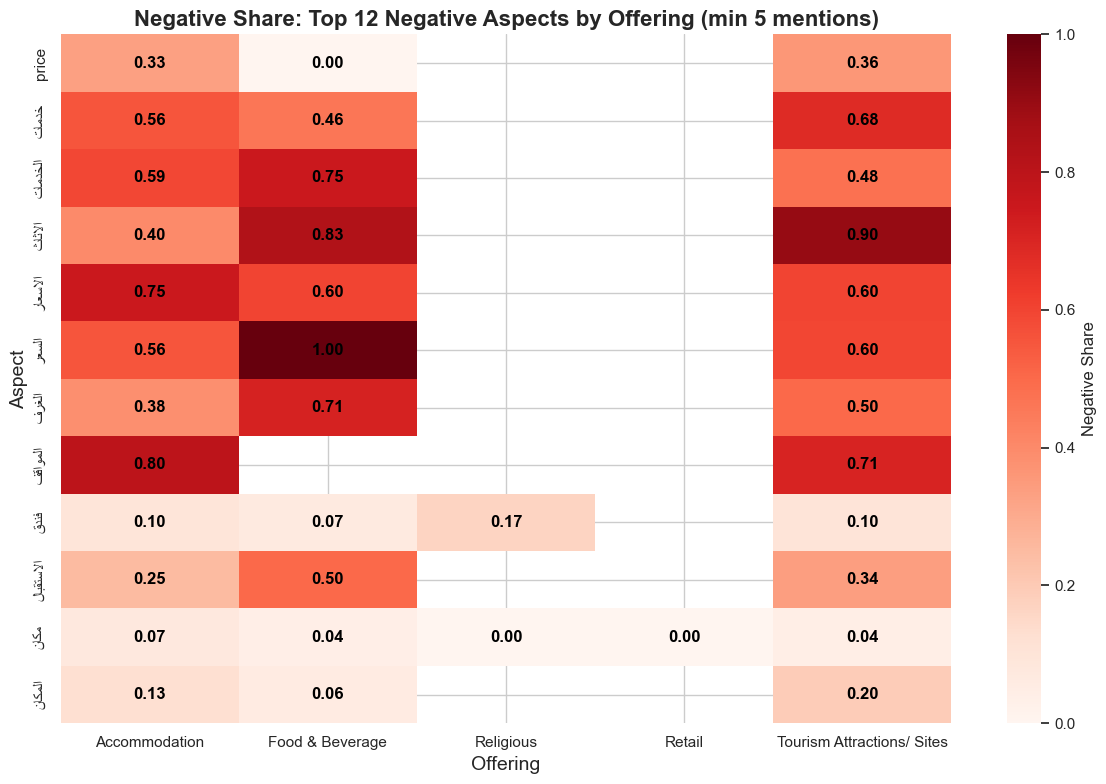

In [36]:
MIN_ASPECT_MENTIONS = 5  # minimum mentions per aspect-offering combo
focus_neg_aspects = aspect_df[neg_mask]['aspect_normalized'].value_counts().head(12).index.tolist()

# Prepare the data
subn = aspect_df[aspect_df['aspect_normalized'].isin(focus_neg_aspects)].copy()
subn = subn.dropna(subset=['offer', 'aspect_normalized'])
subn['is_neg'] = subn['polarity'].astype(str).str.lower().eq('negative')

# Calculate both count and negative share
hmn = (subn.groupby(['aspect_normalized', 'offer'])
       .agg(total_count=('is_neg', 'size'), neg_share=('is_neg', 'mean'))
       .reset_index())

# Filter out combinations with too few mentions
hmn_filtered = hmn[hmn['total_count'] >= MIN_ASPECT_MENTIONS].copy()

# Apply Arabic reshaping to the aspect names for the heatmap index
hmn_filtered['aspect_ar'] = hmn_filtered['aspect_normalized'].apply(display_arabic)

# Pivot table with reshaped aspect labels
pivotn = hmn_filtered.pivot_table(index='aspect_ar', columns='offer', values='neg_share')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivotn, cmap='Reds', vmin=0, vmax=1, annot=True, fmt='.2f', cbar_kws={'label': 'Negative Share'},
            annot_kws={"size": 12, "weight": "bold", "color": "black"})
plt.title(f'Negative Share: Top 12 Negative Aspects by Offering (min {MIN_ASPECT_MENTIONS} mentions)', fontsize=16, weight='bold')
plt.xlabel('Offering', fontsize=14)
plt.ylabel('Aspect', fontsize=14)
plt.tight_layout()
plt.show()

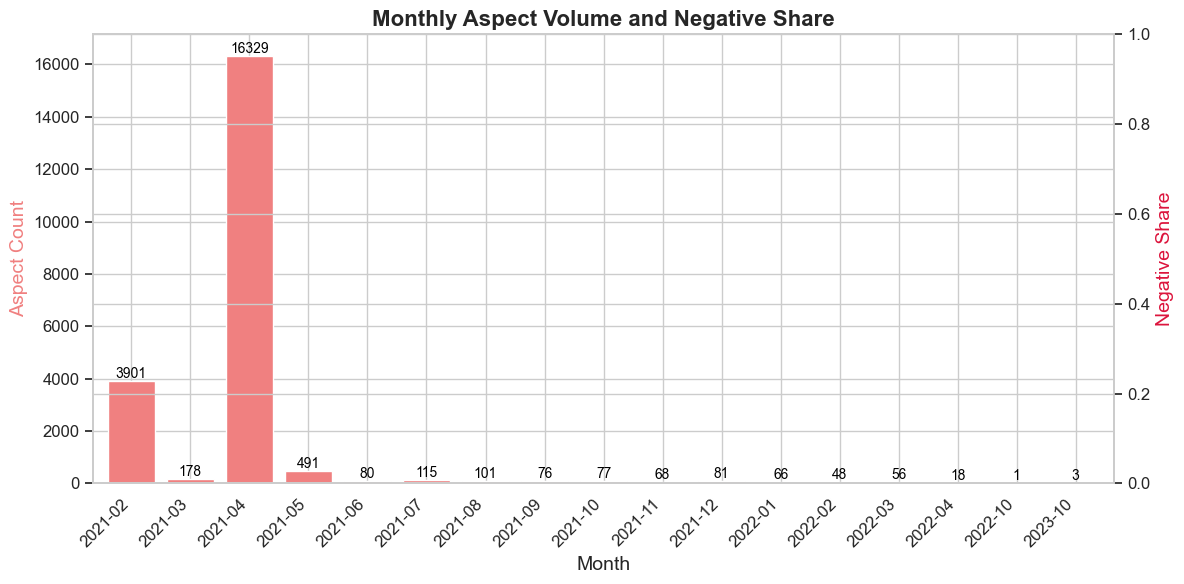

In [55]:

# =========================
# 2) Negativity Share Plot
# =========================

# Group by month and calculate the count and negative share
by_m = (aspect_df.assign(is_neg=aspect_df['polarity'].eq('negative'))
        .groupby('month')
        .agg(count=('is_neg', 'size'), neg_share=('is_neg', 'mean')))

# Plot the bar chart and line plot with the negative share
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for count of aspects per month
by_m['count'].plot(kind='bar', ax=ax1, color='lightcoral', width=0.8)
ax1.set_ylabel('Aspect Count', color='lightcoral', fontsize=14)
ax1.set_xlabel('Month', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

# Add counts on top of bars
for x, v in enumerate(by_m['count'].values):
    ax1.text(x, v + 2, str(v), ha='center', va='bottom', fontsize=10, color='black')

# Second y-axis for negative share line plot
ax2 = ax1.twinx()
ax2.plot(by_m.index, by_m['neg_share'], color='crimson', marker='o', markersize=6, linewidth=2)
ax2.set_ylabel('Negative Share', color='crimson', fontsize=14)
ax2.set_ylim(0, 1)  # Ensure the y-axis for negative share goes from 0 to 1
ax2.tick_params(axis='both', labelsize=12)

# Format x-axis to show just Year-Month and remove the time part
ax1.set_xticklabels([x.strftime('%Y-%m') for x in by_m.index], rotation=45, ha='right', fontsize=12)

# Title and layout adjustments
plt.title('Monthly Aspect Volume and Negative Share', fontsize=16, weight='bold')
plt.tight_layout()

# Show the plot
plt.show()


In [38]:
# 5) Sample negative evidence (high-confidence, showing both original and normalized)
samples = (aspect_df
           .assign(is_neg=pol.eq('negative'))
           .query('is_neg')
           .sort_values('confidence', ascending=False)
           .head(10)[['destination', 'offer', 'aspect', 'aspect_normalized', 'evidence_span', 'confidence', 'normalized_ratings']])
print('Top negative evidence (by confidence):')
display(samples)


Top negative evidence (by confidence):


,destination,offer,aspect,aspect_normalized,evidence_span,confidence,normalized_ratings
8732,Makkah,Accommodation,الاتصالات,الاتصالات,الاتصالات,0.9974,100.0
3352,Jeddah,Accommodation,المحلات,المحلات,المحلات,0.9974,100.0
11370,Khobar,Tourism Attractions/ Sites,معاملة,معاملة,معاملة,0.9974,80.0
5724,Abha,Retail,الاسياب,الاسياب,الاسياب,0.9973,100.0
11642,Al Baha,Tourism Attractions/ Sites,مواقف سيارات,مواقف سيارات,مواقف سيارات,0.9973,100.0
6973,Sakaka / AlJouf,Tourism Attractions/ Sites,خدمة,خدمة,خدمة,0.9973,100.0
5780,Abha,Retail,للمجمع,للمجمع,للمجمع,0.9973,100.0
11232,Riyadh,Food & Beverage,جدران الشقة,جدران الشقة,جدران الشقة,0.9973,80.0
2937,Yanbu,Tourism Attractions/ Sites,لوحة,لوحة,لوحة,0.9973,100.0
9465,Taif,Tourism Attractions/ Sites,خدمات,خدمات,خدمات,0.9973,100.0


## Insights summary
Quick toplines you can paste into a report: key negative aspects, offerings/destinations with higher negatives, and recent trend.

In [39]:
# Compute succinct toplines (using normalized aspects)
pol = aspect_df['polarity'].astype(str).str.lower()
neg_aspect_counts = aspect_df[pol.eq('negative')]['aspect_normalized'].value_counts()

MIN_ROWS = 30
neg_by_off = (aspect_df.assign(is_neg=pol.eq('negative'))
              .groupby('offer')
              .agg(n=('is_neg','size'), neg_share=('is_neg','mean'))
              .query('n >= @MIN_ROWS')
              .sort_values('neg_share', ascending=False))
neg_by_dest = (aspect_df.assign(is_neg=pol.eq('negative'))
               .groupby('destination')
               .agg(n=('is_neg','size'), neg_share=('is_neg','mean'))
               .query('n >= @MIN_ROWS')
               .sort_values('neg_share', ascending=False))

by_m = (aspect_df.assign(is_neg=pol.eq('negative'))
        .groupby(pd.to_datetime(aspect_df['date']).dt.to_period('M').dt.to_timestamp())
        .agg(count=('is_neg','size'), neg_share=('is_neg','mean')))

def pct(x):
    return f"{100*x:.1f}%"

lines = []
lines.append(f"Top negative aspects: {', '.join(neg_aspect_counts.head(5).index.tolist())}")
if not neg_by_off.empty:
    lines.append(f"Offerings with highest negative share (n≥{MIN_ROWS}): " + ', '.join([f"{idx} ({pct(row.neg_share)})" for idx, row in neg_by_off.head(5).iterrows()]))
if not neg_by_dest.empty:
    lines.append(f"Destinations with highest negative share (n≥{MIN_ROWS}): " + ', '.join([f"{idx} ({pct(row.neg_share)})" for idx, row in neg_by_dest.head(5).iterrows()]))

print('\n'.join(lines))

Top negative aspects: المكان, الخدمات, خدمات, السعر, مكان
Offerings with highest negative share (n≥30): Tourism Attractions/ Sites (14.4%), Food & Beverage (11.8%), Accommodation (10.0%), Retail (3.0%), Religious (2.9%)
Destinations with highest negative share (n≥30): Jizan (18.2%), Taif (17.4%), Khobar (16.4%), Umluj (15.5%), Abha (14.8%)
